In [3]:
import numpy as np
import pandas as pd

import scikit_posthocs as sp

import seaborn as sns

import matplotlib.pyplot as plt

from src.book_collaborative_filtering.evaluator import Evaluator

In [4]:
ratings = pd.read_csv('movies.data', sep='\t', names=['user_id', 'item_id', 'rating', 'unix_timestamp'], encoding='latin-1')
number_of_runs = 5000
ratings.head()

FileNotFoundError: [Errno 2] No such file or directory: 'movies.data'

# Baseline

In [3]:
params = {
    "neighborhood_method": None,
    "correlation_method": "pearson",
    "minimal_similarity": -1,
    "number_of_neighbors": 0,
    "minimum_number_of_items_rated_in_common": 1,
    "minimal_number_of_ratings": 1,
    "deviation_from_mean": False,
}

evaluator = Evaluator(ratings=ratings, params=params)
evaluator.run_parallel(number_of_runs=number_of_runs)

metrics = pd.DataFrame(evaluator.metrics)
metrics = metrics.join(pd.DataFrame(params, index=[0]), how='cross')
metrics.to_csv("results/movie_cf_results_baseline.csv")

# Correlation Function

In [4]:
params = {
    "neighborhood_method": None,
    "correlation_method": "spearman",
    "minimal_similarity": -1,
    "number_of_neighbors": 0,
    "minimum_number_of_items_rated_in_common": 1,
    "minimal_number_of_ratings": 1,
    "deviation_from_mean": False,
}

evaluator = Evaluator(ratings=ratings, params=params)
evaluator.run_parallel(number_of_runs=number_of_runs)

metrics = pd.DataFrame(evaluator.metrics)
metrics = metrics.join(pd.DataFrame(params, index=[0]), how='cross')
metrics.to_csv("results/movie_cf_results_spearman.csv")

<Axes: xlabel='correlation_method', ylabel='mae'>

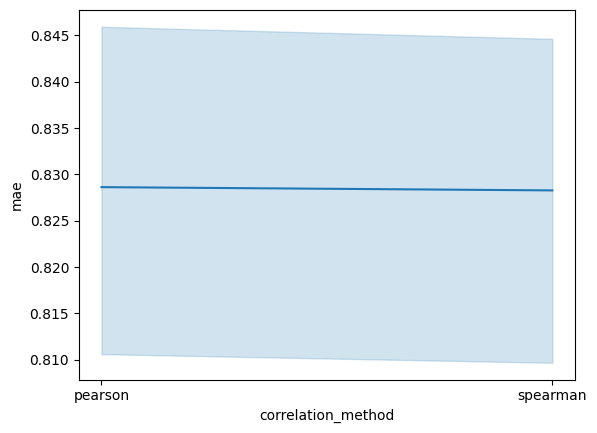

In [5]:
metrics_baseline = pd.read_csv("results/movie_cf_results_baseline.csv")
metrics_spearman = pd.read_csv("results/movie_cf_results_spearman.csv")

sns.lineplot(data=pd.concat([metrics_baseline, metrics_spearman], axis=0).reset_index(), 
             x="correlation_method", y="mae")

# Candidates - Minimum Number of Items Rated in Common

In [6]:
for i, minimum_number_of_items_rated_in_common in enumerate(np.linspace(0, 15, 16)):
    params = {
        "neighborhood_method": None,
        "correlation_method": "pearson",
        "minimal_similarity": -1,
        "number_of_neighbors": 0,
        "minimum_number_of_items_rated_in_common": minimum_number_of_items_rated_in_common,
        "minimal_number_of_ratings": 1,
        "deviation_from_mean": False,
    }

    evaluator = Evaluator(ratings=ratings, params=params)
    evaluator.run_parallel(number_of_runs=number_of_runs)

    metrics = pd.DataFrame(evaluator.metrics)
    metrics = metrics.join(pd.DataFrame(params, index=[0]), how='cross')
    metrics.head()
    metrics.to_csv(f"results/movie_cf_results_minimum_number_of_items_rated_in_common_{i}.csv")

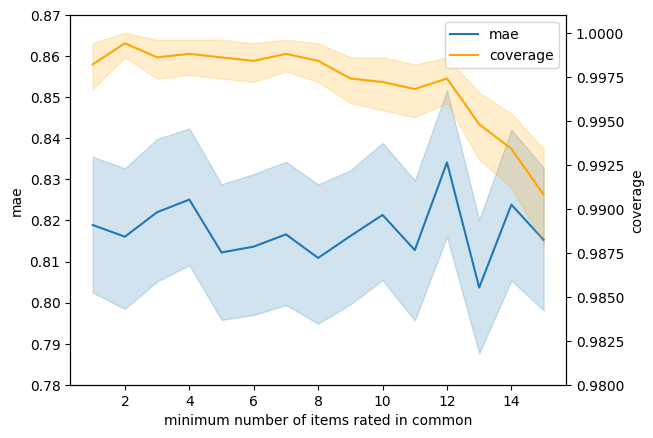

In [22]:
# metrics_baseline = pd.read_csv("results/movie_cf_results_baseline.csv")
metrics_minimum_number_of_items_rated_in_common = pd.concat([pd.read_csv(f"results/movie_cf_results_minimum_number_of_items_rated_in_common_{i}.csv") for i in range(1, 16)], axis=0).reset_index()

fig, ax = plt.subplots()
ax2 = ax.twinx()
# sns.regplot(x="x", y="f", data=df1, order=2, ax=ax)
# sns.regplot(x="x", y="g", data=df2, order=2, ax=ax2)
sns.lineplot(data=metrics_minimum_number_of_items_rated_in_common , x="minimum_number_of_items_rated_in_common", y="mae", ax=ax)
sns.lineplot(data=metrics_minimum_number_of_items_rated_in_common , x="minimum_number_of_items_rated_in_common", y="coverage", ax=ax2, color='orange')
ax.set_xlabel("minimum number of items rated in common")
ax.set_ylim((0.78, 0.87))
ax2.set_ylim((0.98, 1.001))
ax2.legend(handles=[a.lines[0] for a in [ax,ax2]], labels=["mae", "coverage"])

# Neighborhood - Minimal Similarity

In [8]:
for i, minimal_similarity in enumerate(np.linspace(0.0, 1.0, 11)):
    params = {
        "neighborhood_method": "threshold",
        "correlation_method": "pearson",
        "minimal_similarity": minimal_similarity,
        "number_of_neighbors": 0,
        "minimum_number_of_items_rated_in_common": 1,
        "minimal_number_of_ratings": 1,
        "deviation_from_mean": False,
    }

    evaluator = Evaluator(ratings=ratings, params=params)
    evaluator.run_parallel(number_of_runs=number_of_runs)

    metrics = pd.DataFrame(evaluator.metrics)
    metrics = metrics.join(pd.DataFrame(params, index=[0]), how='cross')
    metrics.head()
    metrics.to_csv(f"results/movie_cf_results_minimal_similarity_{i}.csv")

<Axes: xlabel='minimal_similarity', ylabel='mae'>

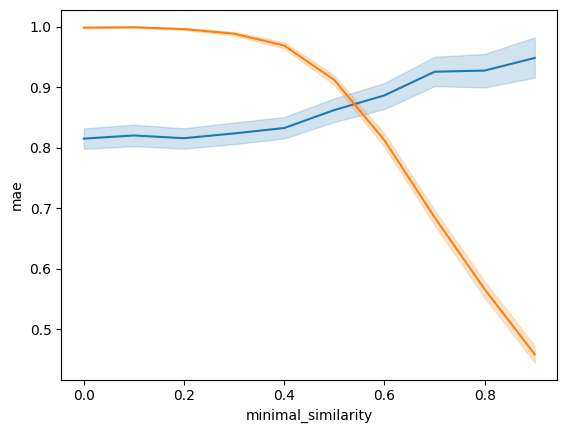

In [7]:
# metrics_baseline = pd.read_csv("results/movie_cf_results_baseline.csv")
metrics_minimal_similarity = pd.concat([pd.read_csv(f"results/movie_cf_results_minimal_similarity_{i}.csv") for i in range(10)], axis=0).reset_index()

sns.lineplot(data=metrics_minimal_similarity, x="minimal_similarity", y="mae")
sns.lineplot(data=metrics_minimal_similarity, x="minimal_similarity", y="coverage")

# Neighborhood - Number of Neighbors

In [15]:
for i, number_of_neighbors in enumerate(np.linspace(100, 1500, 15)):
    params = {
        "neighborhood_method": "number",
        "correlation_method": "pearson",
        "minimal_similarity": -1,
        "number_of_neighbors": int(number_of_neighbors),
        "minimum_number_of_items_rated_in_common": 1,
        "minimal_number_of_ratings": 1,
        "deviation_from_mean": False,
    }

    evaluator = Evaluator(ratings=ratings, params=params)
    evaluator.run_parallel(number_of_runs=number_of_runs)

    metrics = pd.DataFrame(evaluator.metrics)
    metrics = metrics.join(pd.DataFrame(params, index=[0]), how='cross')
    metrics.head()
    metrics.to_csv(f"results/movie_cf_results_number_of_neighbors_{i}.csv")

75000


<Axes: xlabel='number_of_neighbors', ylabel='mae'>

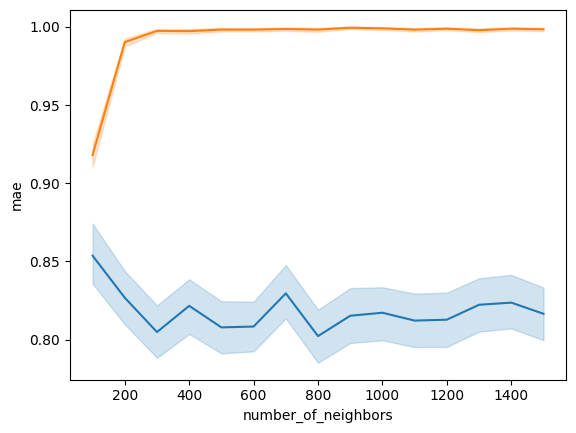

In [16]:
# metrics_baseline = pd.read_csv("results/movie_cf_results_baseline.csv")
number_of_neighbors = pd.concat([pd.read_csv(f"results/movie_cf_results_number_of_neighbors_{i}.csv") for i in range(15)], axis=0).reset_index()

print(len(number_of_neighbors))

sns.lineplot(data=number_of_neighbors, x="number_of_neighbors", y="mae")
sns.lineplot(data=number_of_neighbors, x="number_of_neighbors", y="coverage")

# Mean adjusted

In [13]:
params = {
    "neighborhood_method": None,
    "correlation_method": "pearson",
    "minimal_similarity": -1,
    "number_of_neighbors": 0,
    "minimum_number_of_items_rated_in_common": 1,
    "minimal_number_of_ratings": 1,
    "deviation_from_mean": True,
}

evaluator = Evaluator(ratings=ratings, params=params)
evaluator.run_parallel(number_of_runs=number_of_runs)

metrics = pd.DataFrame(evaluator.metrics)
metrics = metrics.join(pd.DataFrame(params, index=[0]), how='cross')
metrics.head()
metrics.to_csv("results/movie_cf_results_mean_adjusted.csv")

5000


<Axes: xlabel='deviation_from_mean', ylabel='mae'>

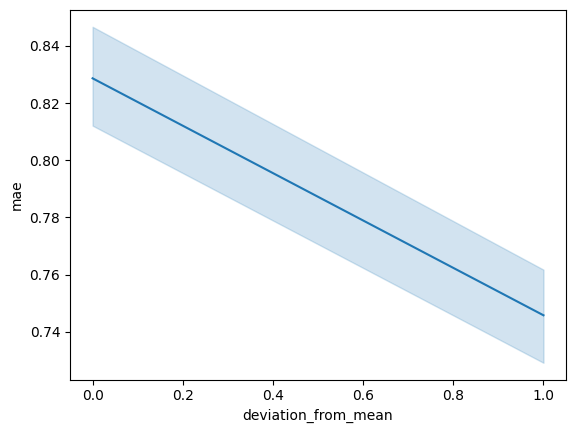

In [14]:
metrics_baseline = pd.read_csv("results/movie_cf_results_baseline.csv")
metrics_mean_adjusted = pd.read_csv("results/movie_cf_results_mean_adjusted.csv")

print(len(metrics_mean_adjusted))

sns.lineplot(data=pd.concat([metrics_baseline, metrics_mean_adjusted], axis=0).reset_index(), x="deviation_from_mean", y="mae")

In [7]:
metrics_baseline = pd.read_csv("results/movie_cf_results_baseline.csv")
metrics_baseline["cv_fold"] = metrics_baseline.index
metrics_baseline["estimator"] = "baseline"
metrics_mean_adjusted = pd.read_csv("results/movie_cf_results_mean_adjusted.csv")
metrics_mean_adjusted["cv_fold"] = metrics_mean_adjusted.index
metrics_mean_adjusted["estimator"] = "mean-adjusted"
metrics_spearman = pd.read_csv("results/movie_cf_results_spearman.csv")
metrics_spearman["cv_fold"] = metrics_spearman.index
metrics_spearman["estimator"] = "Spearman"
minimum_number_of_items_rated_in_common = \
    pd.read_csv(f"results/movie_cf_results_minimum_number_of_items_rated_in_common_5.csv")
minimum_number_of_items_rated_in_common["cv_fold"] = minimum_number_of_items_rated_in_common.index
minimum_number_of_items_rated_in_common["estimator"] = "minimum 5 items rated in common"
metrics_minimal_similarity = pd.read_csv(f"results/movie_cf_results_minimal_similarity_2.csv")
metrics_minimal_similarity["cv_fold"] = metrics_minimal_similarity.index
metrics_minimal_similarity["estimator"] = "minimum similarity of 0.2"
number_of_neighbors = pd.read_csv(f"results/movie_cf_results_number_of_neighbors_7.csv")
number_of_neighbors["cv_fold"] = number_of_neighbors.index
number_of_neighbors["estimator"] = "minimum 800 neighbors"

# data=pd.concat([metrics_baseline, metrics_mean_adjusted, metrics_spearman, minimum_number_of_items_rated_in_common, metrics_minimal_similarity, number_of_neighbors], axis=0)
data=pd.concat([metrics_baseline, metrics_mean_adjusted, metrics_spearman, minimum_number_of_items_rated_in_common, metrics_minimal_similarity, number_of_neighbors], axis=0)
data["score"] = -data["mae"]
data.head()

,Unnamed: 0,coverage,mae,neighborhood_method,correlation_method,minimal_similarity,number_of_neighbors,minimum_number_of_items_rated_in_common,minimal_number_of_ratings,deviation_from_mean,cv_fold,estimator,score
0,0,1.0,0.162049,NaN,pearson,-1.0,0,1.0,1,False,0,baseline,-0.162049
1,1,1.0,0.655694,NaN,pearson,-1.0,0,1.0,1,False,1,baseline,-0.655694
2,2,1.0,1.049274,NaN,pearson,-1.0,0,1.0,1,False,2,baseline,-1.049274
3,3,1.0,1.103050,NaN,pearson,-1.0,0,1.0,1,False,3,baseline,-1.103050
4,4,1.0,0.090625,NaN,pearson,-1.0,0,1.0,1,False,4,baseline,-0.090625


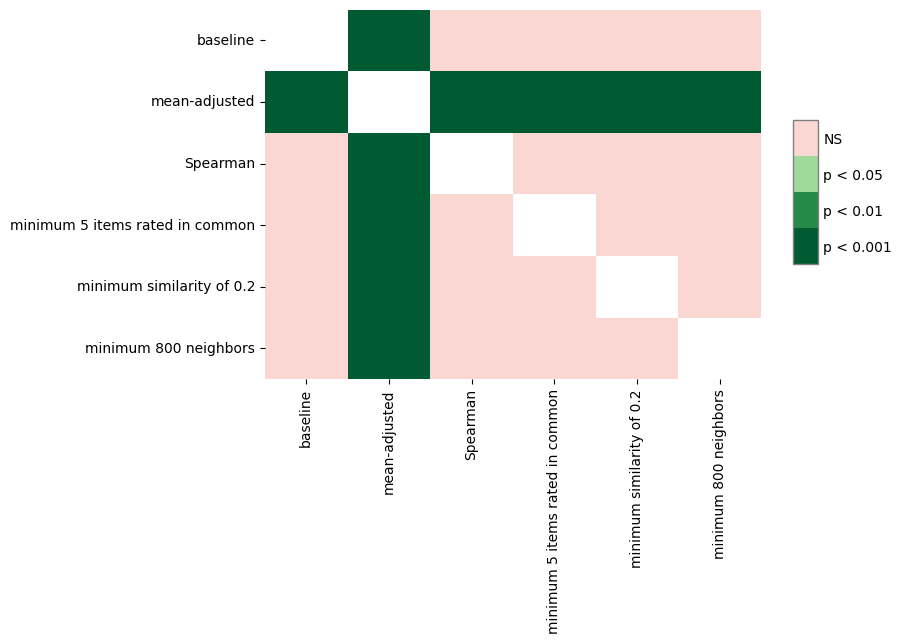

In [14]:
test_results = sp.posthoc_conover_friedman(
    data,
    melted=True,
    block_col='cv_fold',
    group_col='estimator',
    y_col='score',
)
sp.sign_plot(test_results)
# plt.tight_layout()
plt.savefig("results/movie_sign_plot.png", dpi=400)

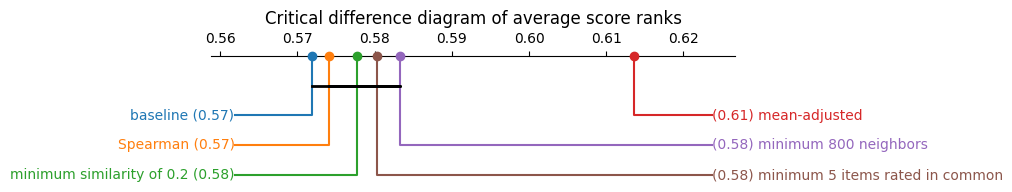

In [12]:
avg_rank = data.groupby('cv_fold').score.rank(pct=True).groupby(data.estimator).mean()

plt.figure(figsize=(10, 2), dpi=100)
plt.title('Critical difference diagram of average score ranks')
sp.critical_difference_diagram(avg_rank, test_results)
plt.tight_layout()
plt.savefig("results/movie_cd_plot.png", dpi=400)